## Tumor Detection Project

### Pre-processig the Data

In [100]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [101]:
#importing and reading the csv file
data = pd.read_csv("Tumor_Detection.csv")
print(data.head())
print(data.columns)
print(data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [102]:
#dropping useless columns
data.drop('id', axis = 1, inplace = True)
print(data.columns)
print(type(data.columns))

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [103]:
#creating a new list
l = list(data.columns)
print(l)

#start points

features_mean = l [1:11]
features_se = l[11:21]
features_worst = l[21:]


['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [104]:
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [105]:
print(features_se)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [106]:
print(features_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [107]:
#unique values
print(data['diagnosis'].unique()) # M - malignant, B - begin

['M' 'B']


<Axes: xlabel='count', ylabel='diagnosis'>

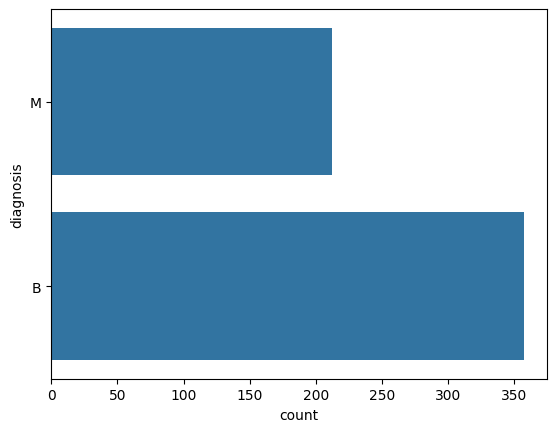

In [108]:
sns.countplot(data['diagnosis'], label = "count")

In [109]:
#describing the dataset
print(data.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [110]:
#correlation
corr = data.select_dtypes(include=['number']).corr()
print(corr)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

<Axes: >

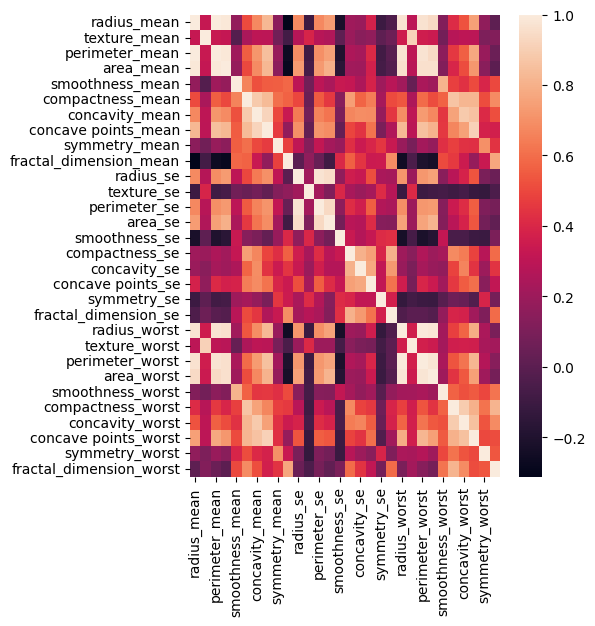

In [111]:
#heatmap 
plt.figure(figsize=(5,6))
sns.heatmap(corr)

In [112]:
#segrigating the data
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})
print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [113]:
print(data['diagnosis'].unique())

[1 0]


In [114]:
x= data.drop('diagnosis', axis =1)
print(x.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [115]:
y = data['diagnosis']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


### Training the Dataset

In [116]:
#divide the dataset into train and test set
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)  

In [117]:
#printing the dataset shape
print(data.shape)

(569, 31)


In [118]:
x_train.shape

(398, 30)

In [119]:
x_test.shape

(171, 30)

In [120]:
y_train.shape

(398,)

In [121]:
y_test.shape

(171,)

In [122]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

x_train

array([[-1.04225241,  0.09249901, -1.04949586, ..., -0.72371424,
        -0.04699555, -0.35717768],
       [-0.77457633, -1.03990538, -0.76480431, ..., -0.79049196,
        -1.75534817, -0.53099517],
       [ 0.08601663,  1.72692072,  0.0177839 , ..., -0.90173757,
        -0.90435908, -1.05244764],
       ...,
       [ 1.31214573, -0.53559574,  1.23639749, ...,  0.79456825,
        -0.02946582,  0.02619548],
       [ 0.29612795,  2.373354  ,  0.20423387, ..., -0.74814881,
         0.51076883, -1.2143524 ],
       [-0.5328044 , -0.34762578, -0.56664896, ..., -0.49985712,
         0.31953532, -0.14924647]], shape=(398, 30))

In [123]:
#apply Random Forest Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9473684210526315


### Explanation

We had a dataframe, we cleaned it ,we preprocessed it, we removed null values, we dropped unnecessary columns , we seprate column according to our convenient. Then we change the string value 'M' and 'B' into numerical form so that it will be easy for our machine to understand. Then we take the statistical properties of the data frame, we created the heatmap and when we finally had a dataframe we divided it into two test set and training set. Then we use standard scaler to fit the training model and the test set. And then, once we had all of the things then we use Random Forest Classifier and set the training x variables and the y training variables into a random forest classifier and then we extracted the predicted value, then we compare the value y text values and y predicted values and the accuracy that we got was 93.56%. 